In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import re

In [2]:
import matplotlib
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
energy = pd.read_csv(r'C:\Users\namu1\data\energy.csv', encoding='euc-kr',engine='python') 
energy.shape

(2400, 22)

In [4]:
energy.head(3)

,충전소명,충전소위치상세,설치시도명,휴점일,이용가능시작시각,이용가능종료시각,완속충전가능여부,급속충전가능여부,급속충전타입구분,완속충전기대수,...,소재지도로명주소,소재지지번주소,관리업체명,관리업체전화번호,위도,경도,데이터기준일자,제공기관코드,제공기관명,Unnamed: 21
0,DTC섬유박물관,지하1층 T6,대구광역시,연중무휴,00:00,00:00,N,Y,DC차데모+AC3상+DC콤보,0.0,...,대구광역시 동구 팔공로 227,대구광역시 동구 봉무동 1560-1,대구환경공단,053-605-8060,35.918978,128.639976,2018-03-14,6270000,대구광역시,NaN
1,갓바위공영3주차장,입구 우측,대구광역시,연중무휴,07:00,20:00,Y,N,NaN,3.0,...,대구광역시 동구 갓바위로 227,대구광역시 동구 진인동 123-74,대구환경공단,053-605-8060,35.970798,128.725896,2018-03-14,6270000,대구광역시,NaN
2,갓바위공영5주차장,입구 우측,대구광역시,연중무휴,07:00,20:00,N,Y,DC차데모+AC3상+DC콤보,0.0,...,대구광역시 동구 진인동 123-38,대구광역시 동구 진인동 123-38,대구환경공단,053-605-8060,35.969378,128.726065,2018-03-14,6270000,대구광역시,NaN


In [5]:
energy.columns

Index(['충전소명', '충전소위치상세', '설치시도명', '휴점일', '이용가능시작시각', '이용가능종료시각', '완속충전가능여부',
       '급속충전가능여부', '급속충전타입구분', '완속충전기대수', '급속충전기대수', '주차료부과여부', '소재지도로명주소',
       '소재지지번주소', '관리업체명', '관리업체전화번호', '위도', '경도', '데이터기준일자', '제공기관코드',
       '제공기관명', 'Unnamed: 21'],
      dtype='object')

In [6]:
energy.drop(columns=['충전소위치상세', '설치시도명', '휴점일', '이용가능시작시각', '이용가능종료시각', '급속충전타입구분', '완속충전기대수', '급속충전기대수','주차료부과여부', 
        '관리업체명', '관리업체전화번호', '데이터기준일자', '제공기관코드',
       '제공기관명', 'Unnamed: 21'], inplace=True)

In [7]:
energy.columns

Index(['충전소명', '완속충전가능여부', '급속충전가능여부', '소재지도로명주소', '소재지지번주소', '위도', '경도'], dtype='object')

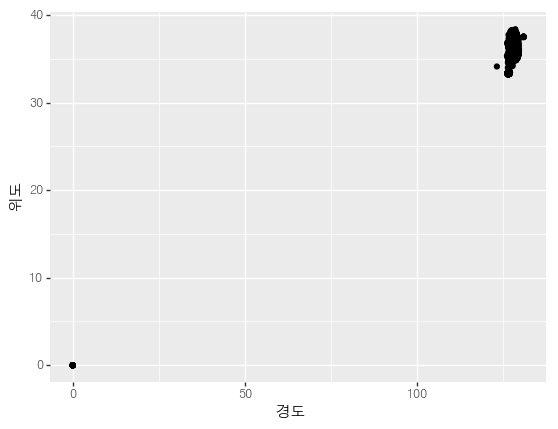

<ggplot: (119799994502)>

In [8]:
(ggplot(energy)
+ aes(x='경도', y='위도')
+ geom_point()
+ theme(text=element_text(family='HYGothic-Medium'))
)

In [9]:
energy.dtypes

충전소명         object
완속충전가능여부     object
급속충전가능여부     object
소재지도로명주소     object
소재지지번주소      object
위도          float64
경도          float64
dtype: object

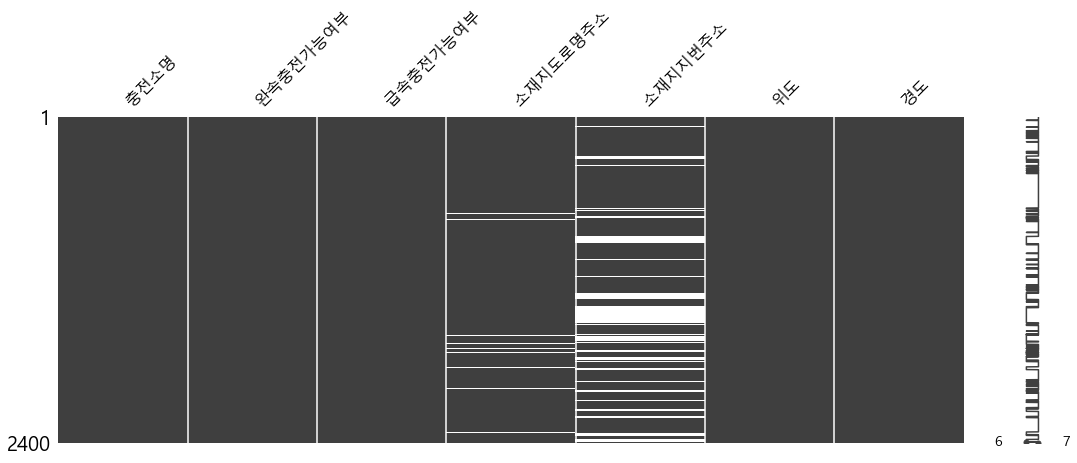

In [10]:
import missingno as msno
msno.matrix(energy, figsize=(18,6))

In [11]:
energy['소재지도로명주소'].isnull().sum()

78

In [12]:
energy['소재지지번주소'].isnull().sum()

548

In [13]:
energy.loc[(energy['소재지도로명주소'].isnull()) & (energy['소재지지번주소'].notnull())].shape

(78, 7)

In [14]:
energy['소재지도로명주소'].fillna(energy['소재지지번주소'], inplace = True)

In [15]:
energy['소재지도로명주소'].isnull().sum()

0

In [16]:
energy_loc=energy.loc[(energy['소재지도로명주소'].isnull()) & (energy['소재지지번주소'].notnull())]
energy_loc.shape

(0, 7)

In [17]:
energy['시도'] = energy['소재지도로명주소'].str.split(' ', expand=True)[0]
energy.head(3)

,충전소명,완속충전가능여부,급속충전가능여부,소재지도로명주소,소재지지번주소,위도,경도,시도
0,DTC섬유박물관,N,Y,대구광역시 동구 팔공로 227,대구광역시 동구 봉무동 1560-1,35.918978,128.639976,대구광역시
1,갓바위공영3주차장,Y,N,대구광역시 동구 갓바위로 227,대구광역시 동구 진인동 123-74,35.970798,128.725896,대구광역시
2,갓바위공영5주차장,N,Y,대구광역시 동구 진인동 123-38,대구광역시 동구 진인동 123-38,35.969378,128.726065,대구광역시


In [18]:
energy['구군'] = energy['소재지도로명주소'].str.split(' ', expand=True)[1]
energy.head(3)

,충전소명,완속충전가능여부,급속충전가능여부,소재지도로명주소,소재지지번주소,위도,경도,시도,구군
0,DTC섬유박물관,N,Y,대구광역시 동구 팔공로 227,대구광역시 동구 봉무동 1560-1,35.918978,128.639976,대구광역시,동구
1,갓바위공영3주차장,Y,N,대구광역시 동구 갓바위로 227,대구광역시 동구 진인동 123-74,35.970798,128.725896,대구광역시,동구
2,갓바위공영5주차장,N,Y,대구광역시 동구 진인동 123-38,대구광역시 동구 진인동 123-38,35.969378,128.726065,대구광역시,동구


In [19]:
energy[['위도','경도']].describe()

,위도,경도
count,2400.000000,2400.000000
mean,35.516757,125.688737
std,4.407354,14.641276
min,0.000000,0.000000
25%,34.938665,126.767072
50%,36.006191,127.037292
75%,37.493324,127.732071
max,38.380616,130.904714


In [20]:
energy_loc_notnull = energy.loc[(energy['위도'] > 32) & (energy['경도'] < 132) & energy['시도'].notnull()]
energy_loc_notnull.shape

(2368, 9)

In [21]:
energy.loc[(energy['위도'] < 26 | (energy['경도'] >=132))]

,충전소명,완속충전가능여부,급속충전가능여부,소재지도로명주소,소재지지번주소,위도,경도,시도,구군
2103,홈플러스 구월점,N,Y,"인천광역시 남동구 예술로 198, 지하주차장 4층,I4구역",인천광역시 남동구 구월동 1130,0.0,0.0,인천광역시,남동구
2104,중부지방고용노동청 별관 앞,N,Y,인천광역시 남동구 구월동 1111-6 중부지방고용노동청 별관 앞,인천광역시 남동구 구월동 1111-6,0.0,0.0,인천광역시,남동구
2105,인천시청,N,Y,"인천광역시 남동구 정각로 29, 정문 우측 경비실 앞(구월동 1138)",인천광역시 남동구 구월동 1138,0.0,0.0,인천광역시,남동구
2106,LH인천본부,N,Y,인천광역시 남동구 논현로46번길 23,인천광역시 남동구 논현동 639-1,0.0,0.0,인천광역시,남동구
2107,인천대공원사업소,Y,N,인천광역시 남동구 무미네로 236,인천광역시 남동구 장수동 408,0.0,0.0,인천광역시,남동구
2108,인천대공원사업소 정문,Y,N,인천광역시 남동구 무미네로 238,인천광역시 남동구 장수동 408,0.0,0.0,인천광역시,남동구
2109,인천광역시 LGBEASTSHOP(남동구청점),Y,N,인천광역시 남동구 소래로 688 주차장,인천광역시 남동구 만수동 377,0.0,0.0,인천광역시,남동구
2110,한전KDN 인천지사,Y,N,인천광역시 남동구 인주대로 855 주차장,인천광역시 남동구 만수동 984-2,0.0,0.0,인천광역시,남동구
2111,인천서부 시승센터,Y,N,인천광역시 남동구 인주대로 629,인천광역시 남동구 구월동 1145-7,0.0,0.0,인천광역시,남동구
2112,고잔점 블루핸즈,Y,N,인천광역시 남동구 은청로 26-24,인천광역시 남동구 고잔동 634-5,0.0,0.0,인천광역시,남동구


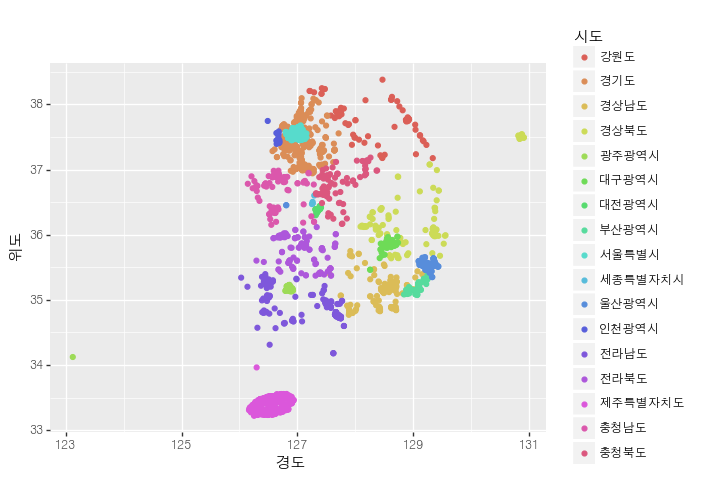

<ggplot: (-9223371917054233635)>

In [22]:
(ggplot(energy_loc_notnull)
+ aes(x='경도', y='위도', color='시도')
+ geom_point()
+ theme(text = element_text(family='HYGothic-Medium'))
)

In [23]:
energy_loc_notnull['시도'].value_counts()

서울특별시      439
제주특별자치도    430
경기도        359
전라남도       175
전라북도       136
경상남도       133
경상북도       112
울산광역시      108
강원도        103
대구광역시       85
충청남도        83
충청북도        80
부산광역시       46
광주광역시       36
대전광역시       20
인천광역시       18
세종특별자치시      5
Name: 시도, dtype: int64

In [24]:
energy_do = pd.DataFrame(energy['시도'].value_counts())
energy_do_normalize = pd.DataFrame(energy['시도'].value_counts(normalize=True))
energy_sido = energy_do.merge(energy_do_normalize, left_index=True, right_index=True).reset_index()
energy_sido.columns = ['시도','합계','비율']
energy_sido.sort_values(by=['합계'], ascending=False)
energy_sido

,시도,합계,비율
0,서울특별시,439,0.182917
1,제주특별자치도,430,0.179167
2,경기도,361,0.150417
3,전라남도,175,0.072917
4,전라북도,136,0.056667
5,경상남도,133,0.055417
6,경상북도,112,0.046667
7,울산광역시,108,0.045000
8,강원도,103,0.042917
9,대구광역시,85,0.035417


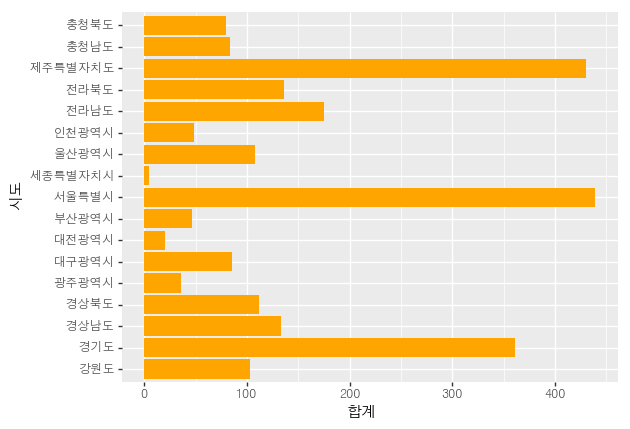

<ggplot: (-9223371917054783516)>

In [25]:
(ggplot(energy_sido.sort_values(by=['합계'], ascending=False))
 + aes(x='시도', y='합계')
 + geom_bar(stat='identity',position='dodge',fill='orange')
 + coord_flip()
 + theme(text=element_text(family='HYGothic-Medium'))
)

In [26]:
ulsan = energy.loc[energy['시도'] == '울산광역시']
ulsan.shape

(108, 9)

In [27]:
ulsan.head(3)

,충전소명,완속충전가능여부,급속충전가능여부,소재지도로명주소,소재지지번주소,위도,경도,시도,구군
56,울산광역시 북구청,N,Y,울산광역시 북구 산업로 1010,울산광역시 북구 연암동 1004-1,35.582457,129.361133,울산광역시,북구
57,농소2동 주민센터,N,Y,울산광역시 북구 찬샘1길 24,울산광역시 북구 신천동 203-2,35.638364,129.348396,울산광역시,북구
58,울산공항,N,Y,울산광역시 북구 산업로 1103,울산광역시 북구 송정동 522,35.593553,129.356480,울산광역시,북구


In [28]:
ulsan.dtypes

충전소명         object
완속충전가능여부     object
급속충전가능여부     object
소재지도로명주소     object
소재지지번주소      object
위도          float64
경도          float64
시도           object
구군           object
dtype: object

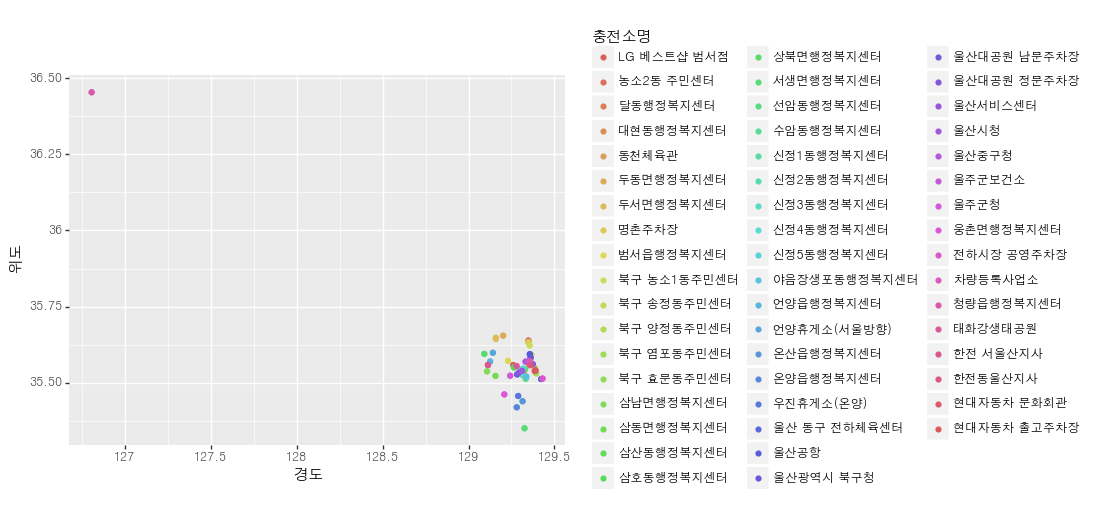

<ggplot: (-9223371917054254255)>

In [29]:
(ggplot(ulsan)
 +aes(x='경도',y='위도',color='충전소명')
 +geom_point()
 +theme(text=element_text(family='HYGothic-Medium'))
)

In [30]:
ulsan_notnull = ulsan[(energy['경도'] > 128)]

C:\Users\namu1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


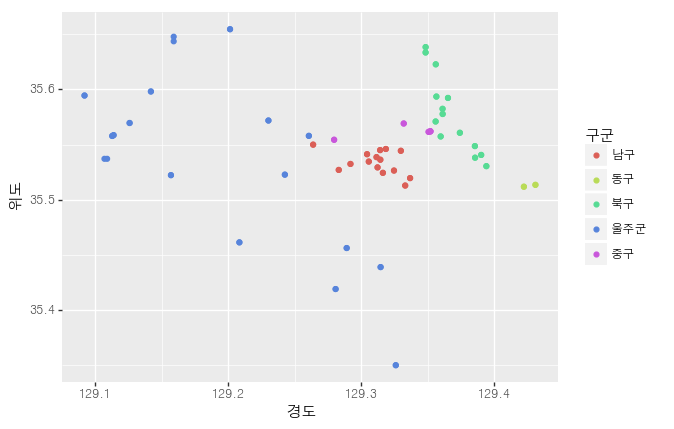

<ggplot: (119800800818)>

In [31]:
(ggplot(ulsan_notnull)
 +aes(x='경도',y='위도',color='구군')
 +geom_point()
 +theme(text=element_text(family='HYGothic-Medium'))
)

In [32]:
ulsan.head(3)

,충전소명,완속충전가능여부,급속충전가능여부,소재지도로명주소,소재지지번주소,위도,경도,시도,구군
56,울산광역시 북구청,N,Y,울산광역시 북구 산업로 1010,울산광역시 북구 연암동 1004-1,35.582457,129.361133,울산광역시,북구
57,농소2동 주민센터,N,Y,울산광역시 북구 찬샘1길 24,울산광역시 북구 신천동 203-2,35.638364,129.348396,울산광역시,북구
58,울산공항,N,Y,울산광역시 북구 산업로 1103,울산광역시 북구 송정동 522,35.593553,129.356480,울산광역시,북구


In [33]:
ulsan['구군'].value_counts()

울주군    36
남구     30
북구     28
중구     10
동구      4
Name: 구군, dtype: int64

In [34]:
ulsan_gugun = pd.DataFrame(ulsan['구군'].value_counts())
ulsan_gugun_normalize = pd.DataFrame(ulsan['구군'].value_counts(normalize=True))
ulsan_gugun = ulsan_gugun.merge(ulsan_gugun_normalize, left_index=True, right_index=True).reset_index()
ulsan_gugun.columns = ['구군','합계','비율']
ulsan_gugun.sort_values(by=['합계'], ascending=False)
ulsan_gugun

,구군,합계,비율
0,울주군,36,0.333333
1,남구,30,0.277778
2,북구,28,0.259259
3,중구,10,0.092593
4,동구,4,0.037037


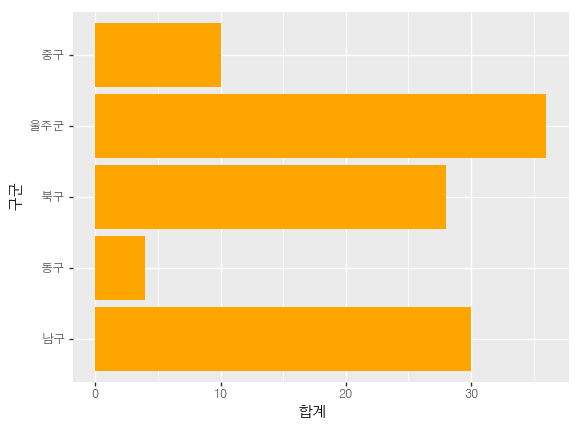

<ggplot: (-9223371917052724676)>

In [35]:
(ggplot(ulsan_gugun.sort_values(by=['합계'], ascending=False))
 + aes(x='구군', y='합계')
 + geom_bar(stat='identity',position='dodge',fill='orange')
 + coord_flip()
 + theme(text=element_text(family='HYGothic-Medium'))
)